In [24]:
def initial_u_matrix(x_matrix,t_matrix):
    """
    Creates a very specific matrix that includes all our initial and boundary values such that our
    unknown values are 0.
    
    This foundation will be:
    [u(x_0,t_0) ; u(x_0,t_1) ; u(x_0,t_2) ; ... ; u(x_0,t_n)]
    [u(x_1,t_0) ;     0      ;     0      ; ... ;     0     ]
    [u(x_2,t_0) ;     0      ;     0      ; ... ;     0     ]
    [    ...    ;     0      ;     0      ; ... ;     0     ]
    [u(x_n,t_0) ; u(x_n,t_1) ; u(x_n,t_2) ; ... ; u(x_n,t_n)]
    =
    [ 1  ;  1  ;  1  ; ... ;  1 ]
    [e^x ;  0  ;  0  ; ... ;  0 ]
    [e^x ;  0  ;  0  ; ... ;  0 ]
    [... ;  0  ;  0  ; ... ;  0 ]
    [ e  ; e^t ; e^t ; ... ; e^t]
    """
    import numpy as np
    
    # Create our zero matrix and make the first row 1
    matrix = np.zeros((x_matrix.shape))
    matrix[0] = 1
    
    # Make the first column e^x and last row e^t
    matrix[:,0] = np.exp(x_matrix[:,0])
    matrix[-1] = np.exp(t_matrix[-1])
    
    return matrix

def graph_3d(x,t,u):
    """Inputs position vector (x), time vector (t), and
    resulting displacement matrix (u) to generate a 3D surface graph."""
    
    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 3D axis and plot points
    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection='3d')
    

    
    
    ax.plot_surface(x, t, u, cmap = 'viridis')
    
    # Label the axes
    ax.set_xlabel('Position')
    ax.set_ylabel('Time')
    ax.set_zlabel('Displacement')
    
    # Rotate and display the plot
    ax.view_init(40,220)
    ax.set_box_aspect(None, zoom=0.75)
    plt.show()

In [18]:
def xux_to_tut(t_max,x_int,t_int):
    """
    We're solving x*u_x=t*u_t with initial condition u(x,1)=e^x and boundary conditions u(0,t)=1 and u(1,t)=e^t.
    
    By default, 0<x<1 and 1<t, and we're solving to get a very specific solution, so the only values
    we can tweak are the maximum t-value and number of subintervals for both independent variables.
    
    NOTE: If your graphs look weird, increase the t_int.
    """
    # Import modules
    import numpy as np
    from time import time
    begin = time()
    
    
    
    
    # Make our arrays of x and t inputs and our interval width constants
    x_val = np.linspace(0, 1, x_int+1)
    x_width = 1 / x_int
    
    t_val = np.linspace(1, t_max, t_int+1)
    t_width = (t_max - 1) / t_int
    
    
    

    # Make our input arrays into repeated matrices
    T_val, X_val = np.meshgrid(t_val,x_val)
    
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(X_val,T_val)
    

    
    
    # Cycle through every 0-value in our U-matrix
    for column in range(1,t_int+1):
        for row in range(1,x_int):
            
            # C = (x_i * t-width) / (t_(j-1) * x-width)
            c_variable = (x_val[row] * t_width) / (t_val[column-1] * x_width)
            
            # u(x_i,t_j) = c * u(x_(i+1),t_(j-1)) + (c-1) * u(x_i,t_(j-1))
            U_val[row][column] = c_variable * U_val[row+1][column-1] + (1-c_variable) * U_val[row][column-1]

    
    
    
    # Display our graph
    graph_3d(X_val, T_val, U_val)
    print(f"Finished in {round(time()-begin,2)} seconds.")

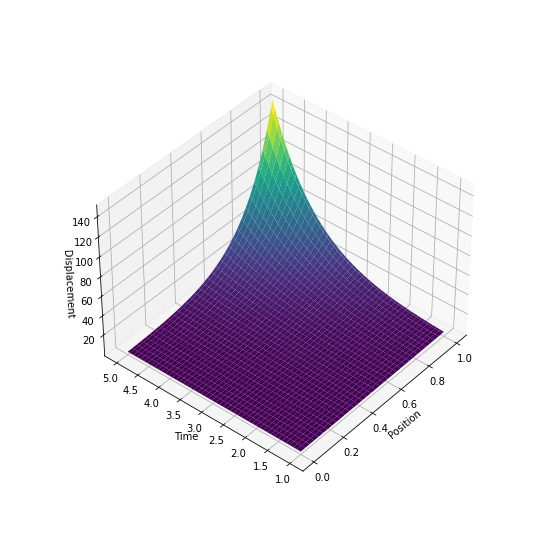

Finished in 0.36 seconds.


In [25]:
xux_to_tut(5,100,1000)

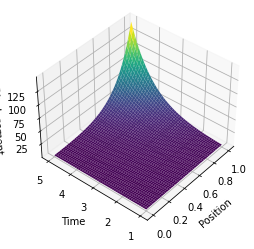

In [13]:
import numpy as np
x = np.linspace(0,1,50)
t = np.linspace(1,5,50)
T, X = np.meshgrid(t,x)
U = np.exp(X * T)


graph_3d(X,T,U)